# Цель работы: 
Применить библиотеку sсikit-learn для построения простой модели классификации по методу k-ближайших средних. Изучить полученные данные, научиться оценивать качество моделей.


Построение модели классификации видов вина:

In [229]:
from sklearn.datasets import load_wine
wine_dataset = load_wine();

In [230]:
#Выведем наши ключи wine_dataset:

print("Ключи wine_dataset: \n{}".format(wine_dataset.keys()))

Ключи wine_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [231]:
print(wine_dataset["DESCR"][:1000] + "\n...")
#краткое описание набора данных:

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [232]:
print("Название ответов: {}".format(wine_dataset['target_names']))
#Классы по которым разделены:

Название ответов: ['class_0' 'class_1' 'class_2']


In [233]:
print("Название признаков: \n{}".format(wine_dataset['feature_names']))

Название признаков: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [234]:
print("Тип массива data: {}".format(type(wine_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [235]:
print("Форма массива data: {}".format(wine_dataset['data'].shape))

Форма массива data: (178, 13)


In [236]:
import pandas as pd
df = pd.DataFrame(wine_dataset['data'][:178])
print("Название признаков: \n{}".format(wine_dataset['feature_names']))
print(df)
#Ниже приведены значения признаков для первых пяти (178) примеров:

Название признаков: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
        0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.1

In [237]:
print("Тип массива target: {}".format(type(wine_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [238]:
print("Форма массива target: {}".format(wine_dataset['target'].shape))

Форма массива target: (178,)


In [239]:
print("Ответы: \n{}".format(wine_dataset['target']))
#Сорта кодируются как целые числа от 0 до 2:

Ответы: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Метрики эффективности: обучающий и тестовые наборы

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)

Эта функция отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым набором. 

In [241]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (133, 13)
Форма массива y_train: (133,)


In [242]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_test: (45, 13)
Форма массива y_test: (45,)


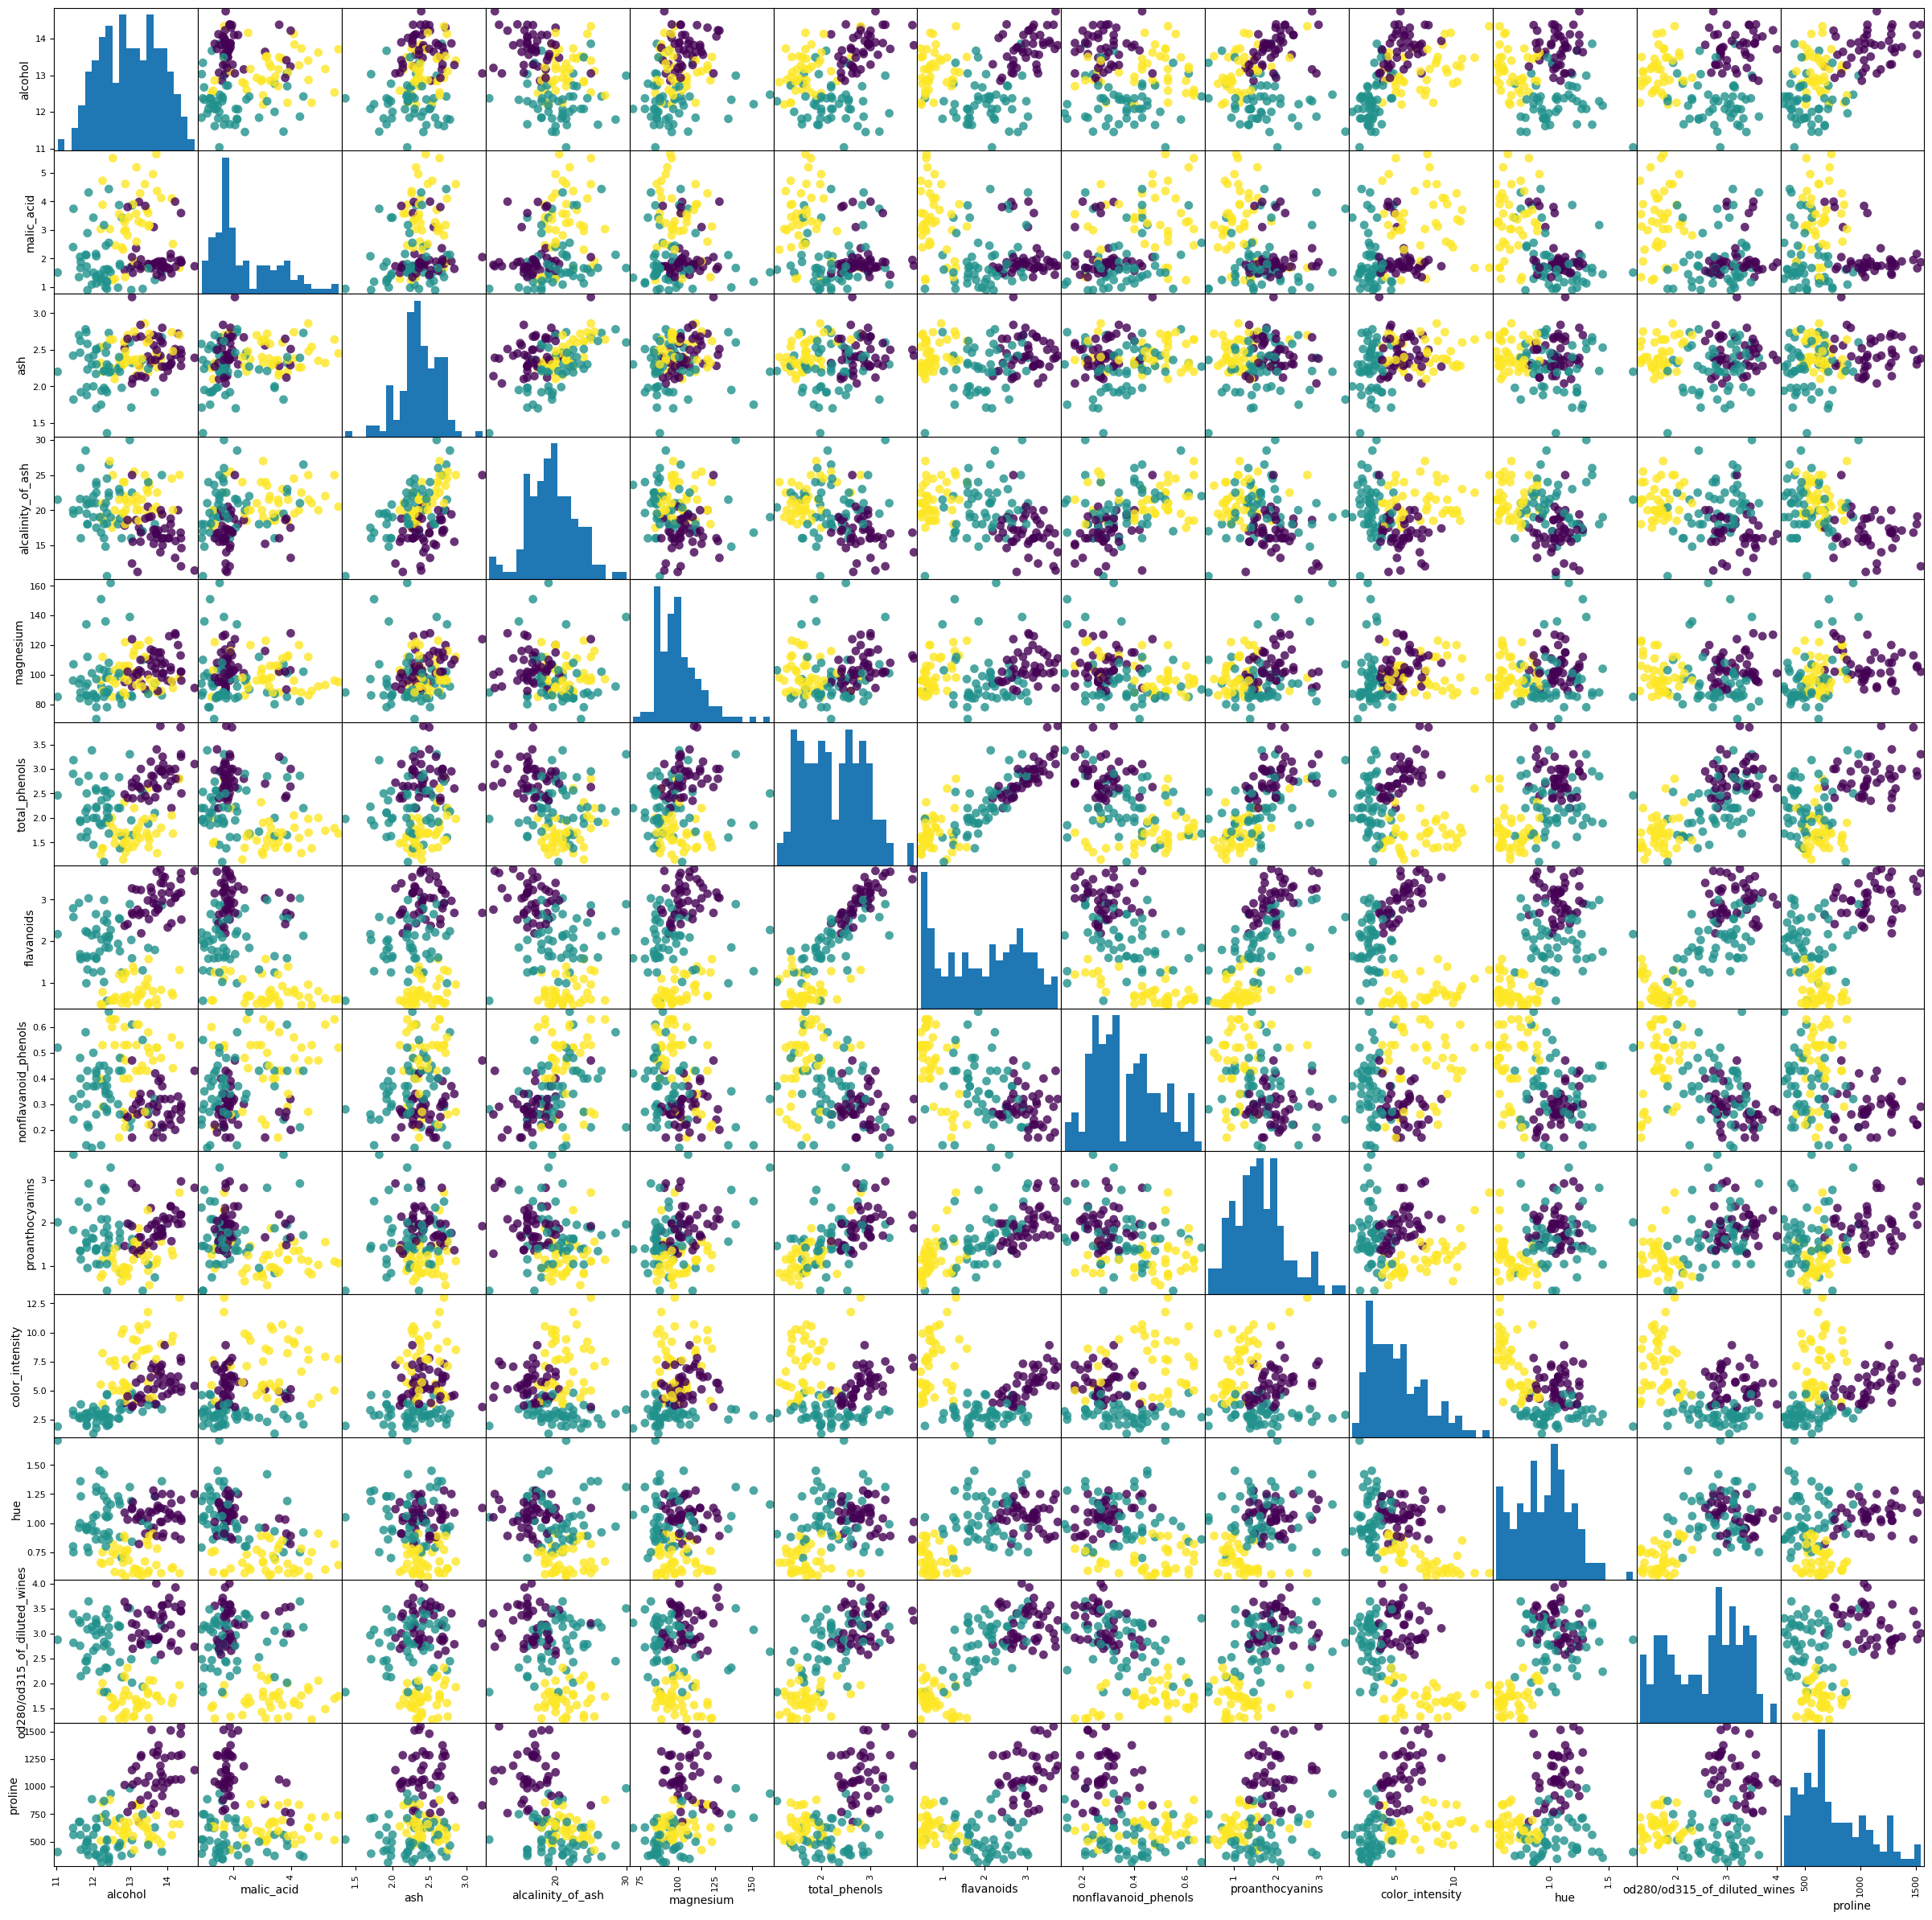

In [243]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=wine_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize= (30,30), marker ='o', hist_kwds={'bins':20}, s=60, alpha=.8)

матрица диаграмм рассеяния для признаков обучающего набора

## Построение модели методом k-ближайших средних

In [244]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [245]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Получение прогнозов

In [246]:
import numpy as np

## Оценка качества модели

вычисляем правильность модели для тестового набора:

In [247]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]


In [248]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.76


In [249]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.76


## Вывод:

Была решена задача обучения с учителем.
Было три возможных вида вина, что делало нашу задачу задачей 3-классовой классификации. 

Мы выбрали алгоритм классификации k ближайших соседей.
Эта модель даст правильные прогнозы в 76% случаев, что является достаточным, но нежелательным результатом.